# Lesson 4 Lab

### For this exercise, we are going to take a look at several studies and outputs in order to get comfortable reading outputs and practicing hypothesis testing.

## Data output 1
This dataset examines the association between an outcome and generic variables x1, x2, x3
<img src='data/generic-output.png'>

#### Question 1.1 X6 has an association with the outcome of -0.2. Is this finding statistically significant? 

Answer: Not high. Becuase the p value is above > 0.05, and the COnfidence interval is more than 0. In 95% of these models the true co-efficient will list within this confidence interval. 

p value is very high (above 0.05). Hence the finding is not statistically significant 

#### Question 1.2 Which of the variables X1, X3, and X6 have a statistically significant finding? 

Answer: X1 (p value of 0 is less than 0.01)

#### Question 1.3 What does a 95% CI of 0.38-0.866 indicate? 

Take a large random sample and calculate the sample mean x¯x¯ and the sample deviation ss. Then the true mean lies, with 95% confidence, in the interval: 0.38-0.866

## Data Output 2 
This is a data set of different animals. We measured the brain size and body size of each animale in our data set. We aim to determine if there is an association between the body size and brain size of animals in our dataset.

<img src="data/body-size.png">

#### Question 2.1 What is the outcome in this model? 

Answer:  brain size 

#### Question 2.2 What is the predictor in this model? 


Answer:body size 

#### Question 2.3 What is the association body and brain size? 


for every 0.9665 increase in body size there is a 1 increase in brain size  WRONG 

for every 1 increase in body size there is a 0.9665  increase in brain size 

#### Question 2.4 Is this relationship statistically significant? How did you decide?

Yes, since P value is less than 0 p <0.05 

#### Question 2.5 Is this relationship biologically significant? What other information would you need to decide this?


Unclear. need to look at the animals collected. 

## COE Prices 

Today we will be looking at COE prices https://data.gov.sg/dataset/coe-bidding-results

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [3]:
coe = pd.read_csv("data/coe-results.csv")

In [6]:
coe.head(20)

month  bidding_no vehicle_class  quota  bids_success  bids_received  \
0   2010-01           1    Category A   1152          1145           1342   
1   2010-01           1    Category B    687           679            883   
2   2010-01           1    Category C    173           173            265   
3   2010-01           1    Category D    373           365            509   
4   2010-01           1    Category E    586           567           1011   
5   2010-01           2    Category A   1151          1149           1673   
6   2010-01           2    Category B    717           717           1105   
7   2010-01           2    Category C    181           173            280   
8   2010-01           2    Category D    378           378            551   
9   2010-01           2    Category E    588           579           1322   
10  2010-02           1    Category A   1154          1153           1326   
11  2010-02           1    Category B    693           690            930   
12  2010-02           1    Category C    165           162            250   
13  2010-02           1    Category D    371           349            525   
14  2010-02           1    Category E    601           596           1069   
15  2010-02           2    Category A   1148          1148           1493   
16  2010-02           2    Category B    685           658            956   
17  2010-02           2    Category C    173           170            285   
18  2010-02           2    Category D    363           355            472   
19  2010-02           2    Category E    590           587           1255   

    premium  
0     18502  
1     19190  
2     19001  
3       889  
4     19889  
5     20501  
6     22400  
7     20090  
8       852  
9     21899  
10    19989  
11    23180  
12    21390  
13      852  
14    22401  
15    20340  
16    23889  
17    23501  
18     1001  
19    24229

In [7]:
coe_pivot = pd.pivot_table(coe, values='premium', columns='vehicle_class', index='month')
# each month there are 2 pivot tables 

coe_pivot.head()

vehicle_class  Category A  Category B  Category C  Category D  Category E
month                                                                    
2010-01           19501.5     20795.0     19545.5       870.5     20894.0
2010-02           20164.5     23534.5     22445.5       926.5     23315.0
2010-03           24595.5     31239.0     29945.5      1179.5     34795.5
2010-04           32000.5     42751.0     36033.5      1237.0     46001.5
2010-05           26745.5     36300.0     30945.0      1282.0     39001.0

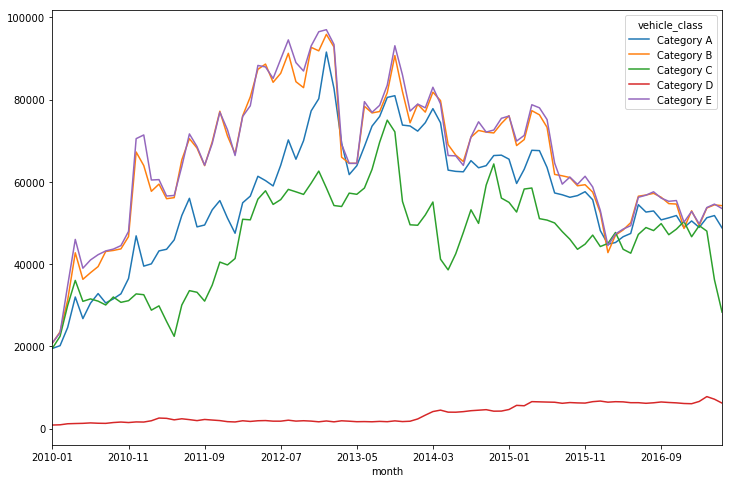

In [8]:
coe_pivot.plot(figsize=(12,8))
plt.show()

#### 1. Create a histogram plot of Category C prices 

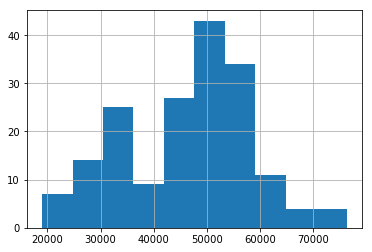

In [23]:
coe[coe.vehicle_class == "Category C"].premium.hist()

ValueError: plot kind 'scatter' can only be used for data frames

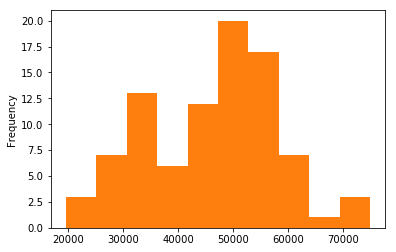

In [39]:
coe_pivot["Category C"].hist()
coe_pivot["Category C"].plot(kind="hist")

# coe_pivot["Category C"].plot(kind="scatter")
# coe_pivot["Category C"].plot(kind="line")

#### 2. Create combined density plots of Category A, B, C, and E prices

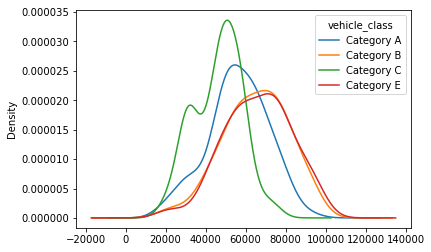

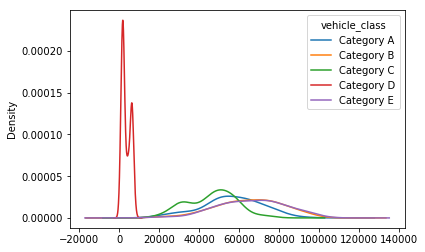

In [40]:
# Work out the exercises here

coe_pivot[["Category A", "Category B", "Category C", "Category E"]].plot(kind="density")



coe_pivot[["Category A", "Category B", "Category C", "Category D", "Category E"]].plot(kind="density")

#### 3. Are the prices normally distributed? Compute their skew and kurtosis values 

In [34]:
print(coe_pivot.skew())
# the skew for category B is really high negatively , it is not normal 

coe_pivot.kurtosis()
# the skew for category B is really approaching 0 from the negative side  , it is not normal 


vehicle_class
Category A   -0.283474
Category B   -0.346584
Category C   -0.154958
Category D    0.449556
Category E   -0.259830
dtype: float64


vehicle_class
Category A   -0.045842
Category B   -0.162985
Category C   -0.475207
Category D   -1.517047
Category E   -0.185555
dtype: float64

#### 4. Are the prices of Category B and E vehicles significantly different? 

In [32]:
statistic, pvalue = stats.f_oneway(coe_pivot["Category B"], coe_pivot["Category E"])
print(pvalue)

0.679998632255


In [ ]:
not statistically different because p value is so high (< 0.05 )

B and E actually are very significant to each other 


less than 0.01 or less than 0.05 is statisticailly significant , then can reject the null hypothesis 
s